In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, LeakyReLU, Input, concatenate, add, Softmax
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
(x_train_0, y_train_0), (x_test_0, y_test_0) = mnist.load_data()

In [6]:
x_train = x_train_0.reshape(x_train_0.shape[0], 28 * 28)
x_test = x_test_0.reshape(x_test_0.shape[0], 28 * 28)

In [8]:
y_train = np_utils.to_categorical(y_train_0, 10)
y_test = np_utils.to_categorical(y_test_0, 10)

In [10]:
x_train -= x_train.min()
x_train = x_train / x_train.max()

In [12]:
x_test -= x_test.min()
x_test = x_test / x_test.max()

In [13]:
x = Input(shape = (784, ))

In [14]:
f_1 = Dense(1024)
a = LeakyReLU(alpha = 0.5)
d = Dropout(0.25)
f_2 = Dense(512)
f_3 = Dense(256)
f_4 = Dense(128)
f_5 = Dense(64)
f_6 = Dense(64)
final = Dense(10)
a_final = Softmax()

In [15]:
out_top = d(a(f_5(d(a(f_3(d(a(f_1(x)))))))))
out_low = d(a(f_6(d(a(f_4(d(a(f_2(x)))))))))
out = concatenate([out_top, out_low])
out = a_final(final(out))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model = Model(x, out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1024)         803840      input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       multiple             0           dense_1[0][0]                    
                                                                 dense_3[0][0]                    
                                                                 dense_5[0][0]                    
                                                                 dense_2[0][0]                    
          

## 神經網路的示意圖

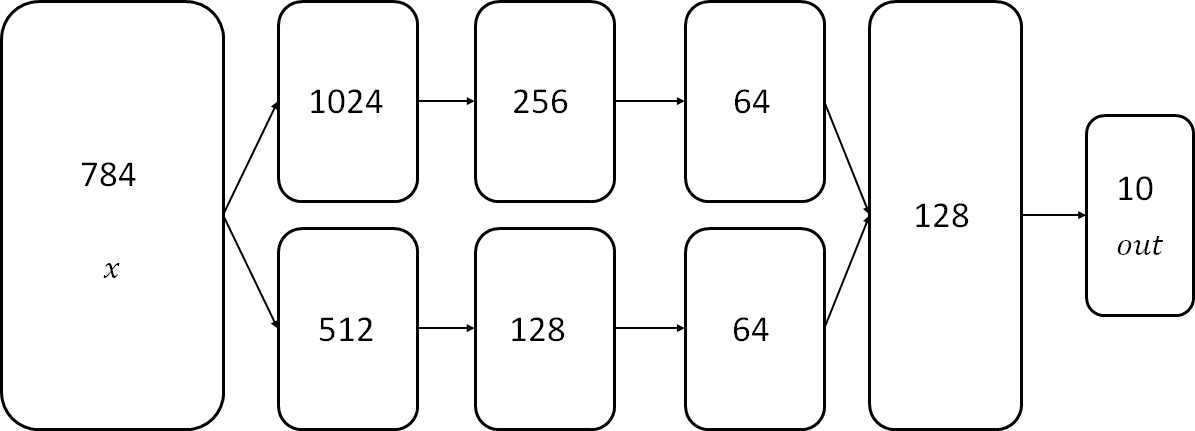

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model_fit = model.fit(x_train, y_train, batch_size = 100, epochs = 20)
score = model.evaluate(x_test, y_test)
print('Testing loss: ', score[0])
print('Testing acc: ', score[1])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.3523 - acc: 0.8955
Epoch 2/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.2444 - acc: 0.9285
Epoch 3/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.2081 - acc: 0.9397
Epoch 4/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.1875 - acc: 0.9447
Epoch 5/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.1736 - acc: 0.9484
Epoch 6/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.1631 - acc: 0.9518
Epoch 7/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.1508 - acc: 0.9551
Epoch 8/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.1495 - acc: 0.9559
Epoch 9/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.1363 - acc: 0.9595
Epoch 10/20
60000/60000 [=========

Text(0, 0.5, 'accuracy')

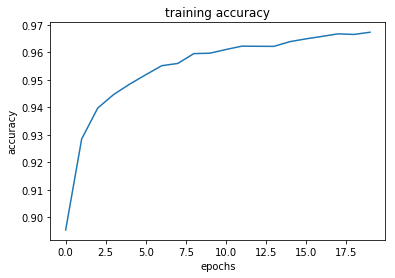

In [18]:
plt.plot(model_fit.history['acc'])
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

## 似乎可以再training一陣子 準確率還會再上升